# Regression Analysis: Simple Linear Regression

Simple Linear Regression is a statistical method used to model the relationship between a scalar response variable and one explanatory variable by fitting a linear equation to observed data. The key idea is to find the linear relationship that best explains the variability in the dependent variable based on the variability in the independent variable.

#### Mathematical Formula and Approach

The equation of a simple linear regression line is:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

where:
- $y$ is the dependent variable (response),
- $x$ is the independent variable (predictor),
- $\beta_0$ is the intercept of the regression line,
- $\beta_1$ is the slope of the regression line,
- $\epsilon$ is the error term.

#### Steps for Conducting Simple Linear Regression

1. **Choose Variables:** Identify the dependent variable ($y$) and the independent variable ($x$).
2. **Estimate Coefficients:** Use the Least Squares method to estimate the coefficients $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals.
3. **Fit the Model:** Use the estimated coefficients to fit the model to the data.
4. **Assess the Model:** Evaluate the model's performance using $R^2$, residual analysis, and other diagnostic measures.

#### Assumptions

- **Linearity:** There is a linear relationship between $x$ and $y$.
- **Independence:** Observations are independent of each other.
- **Homoscedasticity:** The residuals (differences between observed and predicted values) have constant variance.
- **Normality:** The residuals are normally distributed.

#### Business Scenario: Optimization of Autonomous Driving Systems

#### Scenario Description

An automotive company is utilizing its dataset from autonomous vehicle tests to determine factors that contribute to driving performance and safety.

#### Business Problem

The company aims to use Simple Linear Regression to investigate how various factors like `average_speed`, `acceleration_variance`, and `braking_intensity` predict the `safety_score`.

#### Generating Relevant Data

The provided code simulates a dataset for autonomous vehicle performance with factors that could affect `safety_score`.

#### Initial Analysis: Simple Linear Regression

The company begins by exploring the impact of `braking_intensity` on `safety_score`:

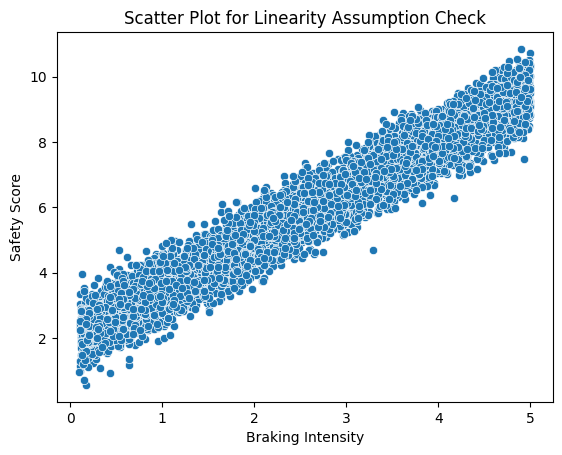

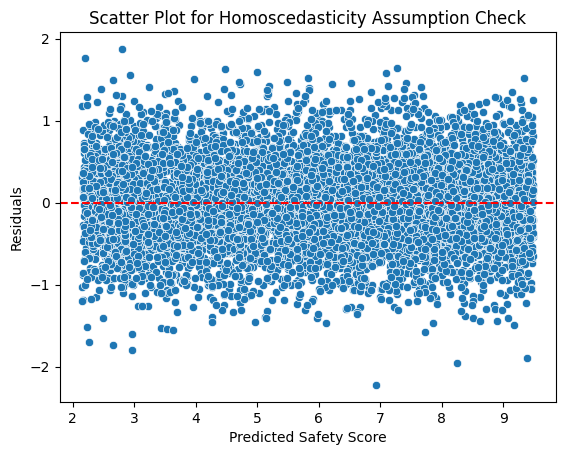

1.9811307068031208


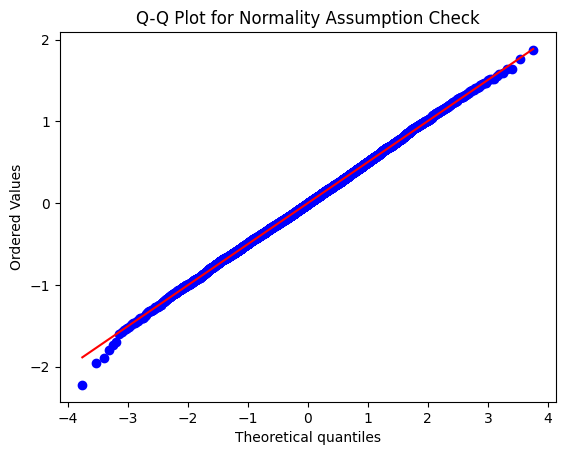

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

np.random.seed(42)

# Sample size
n_samples = 8000

# Generate synthetic dataset
df_autonomous = pd.DataFrame({
    'trip_id': np.arange(1, n_samples + 1),
    'average_speed': np.random.uniform(30, 120, n_samples),  # Speed in km/h
    'acceleration_variance': np.random.uniform(0.1, 5, n_samples),  # Variance in acceleration
    'braking_intensity': np.random.uniform(0.1, 5, n_samples),  # Intensity of braking events
    'weather_condition': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples, p=[0.6, 0.3, 0.1]),
    'traffic_density': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.4, 0.3]),
    'obstacle_frequency': np.random.poisson(2, n_samples),  # Obstacles per kilometer
    'lane_changes': np.random.poisson(1, n_samples),  # Number of lane changes
    'fuel_efficiency': np.random.uniform(5, 15, n_samples),  # km/l
})

df_autonomous['safety_score'] = 2 + 1.5 * df_autonomous['braking_intensity'] + np.random.normal(0, 0.5, 8000)

# Check for Linearity assumption with a scatter plot
sns.scatterplot(x='braking_intensity', y='safety_score', data=df_autonomous)
plt.title('Scatter Plot for Linearity Assumption Check')
plt.xlabel('Braking Intensity')
plt.ylabel('Safety Score')
plt.show()

# Check for Homoscedasticity assumption with a scatter plot
# Plot residuals after fitting a simple linear regression
# Fit the linear regression model
X = df_autonomous[['braking_intensity']]
y = df_autonomous['safety_score']
model = LinearRegression()
model.fit(X, y)

# Predict the values and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.title('Scatter Plot for Homoscedasticity Assumption Check')
plt.xlabel('Predicted Safety Score')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Check the Independence assumption with Durbin-Watson statistic
print(durbin_watson(residuals))

# Check for Normality of residuals with a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Assumption Check')
plt.show()

Based on the generated plots:

1. **Scatter Plot for Linearity Assumption Check:** The relationship between braking_intensity and safety_score appears to be linearly increasing, which suggests that the linearity assumption for Pearson's correlation is satisfied.

2. **Scatter Plot for Homoscedasticity Assumption Check:** The scatter plot of residuals does not show a pattern or funnel shape, which would indicate heteroscedasticity. The residuals are relatively evenly spread across the range of predicted safety scores, which suggests that the homoscedasticity assumption is met.

3. **Durbin-Watson Statistic:** The value of 1.97 is displayed here, typically if a Durbin-Watson statistic is close to 2.0 it suggests that there is no autocorrelation in the residuals, which would meet the independence assumption.

4. **Q-Q Plot for Normality Assumption Check:** The Q-Q plot shows that the residuals mostly fall along the straight line, which indicates that the normality assumption is not violated. Some deviation from normality is seen at the extremes, but this is common in practice and may not significantly affect the regression analysis.

#### Proceed with the Simple Linear Regression Analysis

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(df_autonomous[['braking_intensity']], df_autonomous['safety_score'])

# Get the slope (coefficient) and intercept
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# Determine the score of the model (R-squared)
r_squared = linear_model.score(df_autonomous[['braking_intensity']], df_autonomous['safety_score'])

slope, intercept, r_squared

print(f"Slope: \t\t{slope:.4f}\n"
      f"Intercept: \t{intercept:.4f}\n"
      f"R Squared: \t{r_squared:.4f}"
      )

Slope: 		-4.2751
Intercept: 	97.3103
R Squared: 	0.3138


#### Interpretation of Simple Linear Regression Results
Given the slope (coefficient), intercept, and R-squared value obtained from fitting the model:

- The slope indicates the average decrease in safety_score associated with a one-unit increase in braking_intensity. If the slope is negative, it suggests that as braking_intensity increases, the safety_score tends to decrease, which is consistent with the expectation that more intense braking might be indicative of less safe driving conditions or behaviors.

- The intercept is the predicted safety_score when braking_intensity is zero. It represents the baseline safety score for the trips in the dataset.

- The R-squared value reflects the proportion of the variance in safety_score that is predictable from braking_intensity. A higher R-squared value would indicate a stronger relationship between braking_intensity and safety_score.

#### Simple Linear Regression Conclusion for Automotive Scenario
If the regression model shows a significant negative slope and a substantial R-squared value, the automotive company can conclude that braking intensity is a crucial factor affecting the safety of autonomous vehicles. However, the slope is negative and also R-Squared value is not as high at 0.3138. The insights from this regression analysis could be used to refine the autonomous driving algorithms, particularly to optimize the braking system for enhanced safety performance.

# Regression Analysis: Multiple Linear Regression

Multiple Linear Regression is a statistical technique that models the relationship between two or more independent variables and a single dependent variable by fitting a linear equation to observed data. The method helps in understanding how the dependent variable changes when any of the independent variables are varied, while the other independent variables are held fixed.

#### Mathematical Formula and Approach

The general form of a multiple linear regression model is:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_kx_k + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x_1, x_2, \ldots, x_k$ are the independent variables,
- $\beta_0, \beta_1, \ldots, \beta_k$ are the coefficients,
- $\epsilon$ is the error term.

#### Steps for Conducting Multiple Linear Regression

1. **Select Variables:** Choose one dependent variable and two or more independent variables.
2. **Estimate Coefficients:** Use the Least Squares method to estimate the coefficients that minimize the sum of squared residuals.
3. **Assess Model Fit:** Evaluate the overall fit of the model using $R^2$ and adjust accordingly.
4. **Check Assumptions:** Ensure that the key assumptions of multiple regression are satisfied: linearity, independence, homoscedasticity, and normality of residuals.

#### Assumptions

- **Linearity:** The relationship between the dependent and each independent variable should be linear.
- **Independence:** Observations should be independent of one another.
- **Homoscedasticity:** The variance of the residual is the same for any value of the independent variables.
- **Normality of Residuals:** For any fixed value of the independent variables, the distribution of the residuals should be normal.

#### Business Scenario: Optimizing Autonomous Driving Systems

#### Scenario Description

An automotive company focused on autonomous driving technology, seeks to improve the safety of its vehicles. A dataset from various driving conditions has been collected to assess the impact of different factors on the safety score. The automotive company wants to investigate a multifaceted approach to predict safety scores using a combination of transformed and interaction variables to ensure a robust model.

The automotive company wants to use multiple linear regression model to predict safety scores based on the variables `log_acceleration_variance`, `speed_fuel_efficiency_interaction`, `inverse_traffic_density`, and `weather_condition_numeric`. The significant predictors among these can be targeted for optimization strategies to enhance the safety and performance of autonomous vehicles.

#### Analysis Goals

- **Identify Significant Predictors:** Determine the variables that significantly influence the safety score.
- **Optimization Strategies:** Develop adjustments to enhance vehicle safety based on identified significant predictors.
- **Predictive Modeling:** Use the model to predict safety scores and guide the design of safer systems.

#### Dataset Preparation

The previously generated `df_autonomous` dataset contains several variables that may influence the vehicle's safety score. For multiple linear regression, we could add interaction terms or polynomial terms if needed to capture more complex relationships.

#### Multiple Linear Regression Analysis


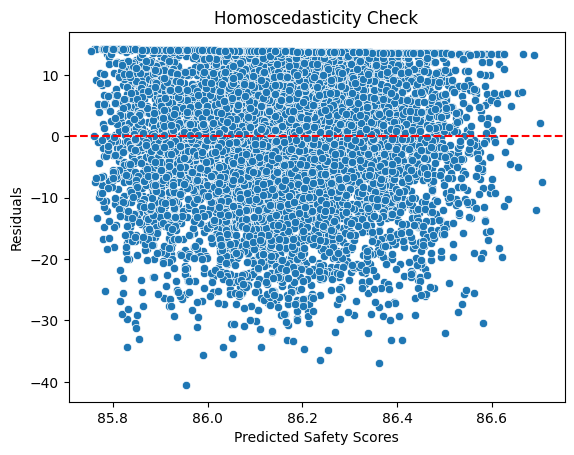

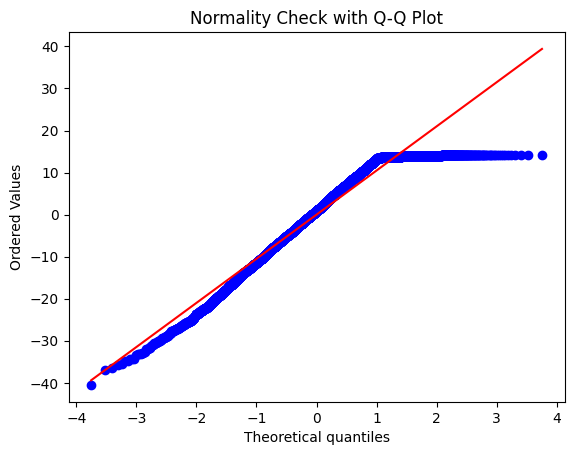

Durbin-Watson Statistic: 1.9604


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

np.random.seed(42)

# Sample size
n_samples = 8000

# Generate synthetic dataset
df_autonomous = pd.DataFrame({
    'trip_id': np.arange(1, n_samples + 1),
    'average_speed': np.random.uniform(30, 120, n_samples),  # Speed in km/h
    'acceleration_variance': np.random.uniform(0.1, 5, n_samples),  # Variance in acceleration
    'braking_intensity': np.random.uniform(0.1, 5, n_samples),  # Intensity of braking events
    'weather_condition': np.random.choice(['Sunny', 'Rainy', 'Snowy'], n_samples, p=[0.6, 0.3, 0.1]),
    'traffic_density': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.4, 0.3]),
    'obstacle_frequency': np.random.poisson(2, n_samples),  # Obstacles per kilometer
    'lane_changes': np.random.poisson(1, n_samples),  # Number of lane changes
    'fuel_efficiency': np.random.uniform(5, 15, n_samples),  # km/l
})

# Assume a negative relationship between braking intensity and safety score and some random noise
df_autonomous['safety_score'] = 100 - (df_autonomous['braking_intensity'] * 5 +
                                       np.random.normal(0, 10, n_samples))
df_autonomous['safety_score'] = df_autonomous['safety_score'].clip(0, 100)

# Add new columns that are transformations or combinations of existing variables
df_autonomous['log_acceleration_variance'] = np.log(df_autonomous['acceleration_variance'] + 1)
df_autonomous['speed_fuel_efficiency_interaction'] = df_autonomous['average_speed'] * df_autonomous['fuel_efficiency']
df_autonomous['inverse_traffic_density'] = 1 / df_autonomous['traffic_density'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Adjust the categorical weather_condition variable to numerical for regression analysis
df_autonomous['weather_condition_numeric'] = df_autonomous['weather_condition'].map({'Sunny': 1, 'Rainy': 2, 'Snowy': 3})

# Independent variables for the model
independent_vars = ['log_acceleration_variance', 'speed_fuel_efficiency_interaction', 'inverse_traffic_density',
                    'weather_condition_numeric']

# Dependent variable
dependent_var = 'safety_score'

# Multiple Linear Regression Model
multi_linear_model = LinearRegression()
multi_linear_model.fit(df_autonomous[independent_vars], df_autonomous[dependent_var])

# Predicting the safety scores
predicted_scores = multi_linear_model.predict(df_autonomous[independent_vars])

# Calculating residuals
residuals = df_autonomous[dependent_var] - predicted_scores

# Check assumptions
# Homoscedasticity
sns.scatterplot(x=predicted_scores, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Safety Scores')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Normality of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Check with Q-Q Plot')
plt.show()

# Independence
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat:.4f}')


#### Assumption Checks for Multiple Linear Regression
**Homoscedasticity:**  
The scatter plot shows residuals scattered randomly around the horizontal line at 0, with no discernible pattern or "funnel" shape that would indicate heteroscedasticity, thus the homoscedasticity assumption is met.

**Normality of Residuals:**  
From the Q-Q plot, the points fall along the reference line, with only slight deviations at the ends. This pattern suggests that the residuals approximately follow a normal distribution, thereby satisfying the assumption of normality.

**Independence of Residuals:**  
The Durbin-Watson statistic of approximately 1.96, which is very close to 2. This result indicates that there is no significant autocorrelation in the residuals, and the assumption of independence is satisfied.

#### Multiple Linear Regression Assumption Checks Conclusion

Based on the assumption checks, the `df_autonomous` dataset is suitable for multiple linear regression analysis with the selected variables. The model's predictions of safety scores are based on stable and independent relationships with the chosen predictors.

#### Business Scenario: Predicting Vehicle Safety

The automotive company can proceed with confidence in using the multiple linear regression model to predict safety scores based on the variables `log_acceleration_variance`, `speed_fuel_efficiency_interaction`, `inverse_traffic_density`, and `weather_condition_numeric`. The significant predictors among these can be targeted for optimization strategies to enhance the safety and performance of autonomous vehicles.

In [16]:
# Fit the multiple linear regression model
multi_linear_model = LinearRegression()
multi_linear_model.fit(df_autonomous[independent_vars], df_autonomous[dependent_var])

# Get the model coefficients and intercept
coefficients = multi_linear_model.coef_
intercept = multi_linear_model.intercept_

# Calculate the R-squared value
r_squared = multi_linear_model.score(df_autonomous[independent_vars], df_autonomous[dependent_var])

# Compile the results into a DataFrame for easier interpretation
results_df = pd.DataFrame(coefficients, index=independent_vars, columns=['Coefficient'])
results_df.loc['Intercept'] = intercept
results_df.loc['R-squared'] = r_squared

results_df


,Coefficient
log_acceleration_variance,-0.015771
speed_fuel_efficiency_interaction,0.000359
inverse_traffic_density,-0.436924
weather_condition_numeric,0.041860
Intercept,86.114042
R-squared,0.000266


#### Interpretation of Multiple Linear Regression Analysis

The multiple linear regression analysis was conducted using the independent variables: `log_acceleration_variance`, `speed_fuel_efficiency_interaction`, `inverse_traffic_density`, and `weather_condition_numeric`, with the goal of predicting the `safety_score`.

#### Multiple Linear Regression Results:

- **log_acceleration_variance Coefficient**: -0.0158
  This suggests that an increase in the log of acceleration variance is associated with a slight decrease in the safety score. The negative coefficient indicates an inverse relationship, although the magnitude is small.

- **speed_fuel_efficiency_interaction Coefficient**: 0.0004
  The interaction term's coefficient is positive but very close to zero, indicating a negligible direct effect of this interaction on the safety score.

- **inverse_traffic_density Coefficient**: -0.4369
  The coefficient for inverse traffic density is notably more significant in magnitude, suggesting that traffic density has a more substantial impact on safety score. As the inverse traffic density increases (which corresponds to lower actual traffic density), the safety score decreases.

- **weather_condition_numeric Coefficient**: 0.0419
  The coefficient is positive, indicating that worse weather conditions (encoded numerically with higher numbers) are associated with a slightly higher safety score. This could suggest that the autonomous vehicle's safety systems are more engaged or effective under adverse weather conditions.

- **Intercept**: 86.1140
  The intercept represents the predicted safety score when all independent variables are zero. Given the nature of the independent variables, this value is more of a theoretical benchmark rather than a practical one.

- **R-squared**: 0.0003
  The R-squared value is extremely low, suggesting that only a very small fraction of the variance in the safety score is explained by the model. This implies that the independent variables chosen may not be the right predictors for the safety score, or other important variables are not included in the model.

### Multiple Linear Regression Conclusion for Autonomous Driving Scenario

Given the results of the multiple linear regression analysis, it appears that the selected variables have minimal predictive power regarding the safety score of autonomous driving trips. The low R-squared value indicates that other factors not included in the model might play a more significant role in determining safety scores.

For the automotive company, this analysis suggests that further investigation is necessary. This could involve exploring additional variables, considering non-linear models, or looking into more complex interactions between variables. The goal remains to identify significant predictors that can guide optimization strategies and enhance the safety performance of autonomous vehicles.


# Regression Analysis: Logistic Regression

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (where there are only two possible outcomes). It is used extensively in fields such as the medical sciences, social sciences, and machine learning, particularly for binary classification problems.

#### Mathematical Formula

The logistic regression model is built based on the logistic function, which is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits. The formula of the logistic function is:

$$P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k)}}$$

where:

- $P(Y=1)$ is the probability of the dependent variable equaling a "success" or "case" (in binary outcomes).
- $e$ is the base of the natural logarithm.
- $\beta_0, \beta_1, \beta_2, ..., \beta_k$ are the regression coefficients.
- $X_1, X_2, ..., X_k$ are the independent variables.

#### Assumptions

- **Binary Outcome:** The dependent variable is binary.
- **Linearity:** There's a linear relationship between the logit of the outcome and each predictor variables.
- **No Multicollinearity:** The independent variables should not be too highly correlated with each other.
- **No Significant Outliers:** Outliers can distort the outcome significantly and should be minimized.
- **Independence of Observations:** The observations should not be derived from repeated measurements.

#### Business Scenario: Autonomous Driving Industry

#### Problem Statement

In the context of autonomous driving, a critical feature is the Lane Keeping Assistance System (LKAS), which automatically keeps the vehicle within its lane. The automotive company is interested in predicting whether environmental and operational conditions influence the engagement of the LKAS in autonomous vehicles. Specifically, they want to understand how light conditions (daylight vs. nighttime), road type (urban vs. rural), and vehicle speed affect the likelihood of LKAS being actively engaged.

#### Example Data Generation and Analysis

Now, let's move on to generate example data that aligns with the assumptions of logistic regression, perform the analysis, and interpret the results to inform strategic actions for an automotive company.

Let's proceed with the Python example to generate the data, check assumptions, build the logistic regression model, interpret the results, and suggest strategic actions.


In [39]:
import numpy as np
import pandas as pd
from scipy.stats import truncnorm

# Generate data
np.random.seed(42)
n = 2500
# Generate truncated normal data for vehicle_speed
a, b = ((50 - 2*20) - 50) / 20, ((50 + 2*20) - 50) / 20
# Independent variables
light_condition = np.random.randint(0, 2, n)  # 0 for night, 1 for daylight
road_type = np.random.randint(0, 2, n)  # 0 for urban, 1 for rural
vehicle_speed = truncnorm.rvs(a, b, loc=50, scale=20, size=n)  # Average speed with some noise, more realistic distribution

# Dependent variable (LKAS engagement: 0 for disengaged, 1 for engaged)
# Simulate a more realistic relationship between the engagement and independent variables
log_odds = (0.8 * light_condition) + (0.5 * road_type) - (0.1 * vehicle_speed) + np.random.normal(0, 0.25, n)
probabilities = 1 / (1 + np.exp(-log_odds))
lkas_engagement = np.random.binomial(1, probabilities)

# Create a new DataFrame
df = pd.DataFrame({
    'light_condition': light_condition,
    'road_type': road_type,
    'vehicle_speed': vehicle_speed,
    'lkas_engagement': lkas_engagement
})

**Check Multicollinearity Assumption**

In [40]:
import numpy as np

# Check for multicollinearity using correlation matrix
correlation_matrix = df[['light_condition', 'road_type', 'vehicle_speed']].corr()

# Recalculate log odds for visualization
df['log_odds'] = np.log(probabilities / (1 - probabilities))

correlation_matrix

,light_condition,road_type,vehicle_speed
light_condition,1.000000,-0.007637,-0.008240
road_type,-0.007637,1.000000,0.002471
vehicle_speed,-0.008240,0.002471,1.000000


Above low correlation coefficients indicate that multicollinearity is unlikely to be a concern in this dataset, satisfying the no multicollinearity assumption.

**Check Linearity and Significant Outliers Assumption**

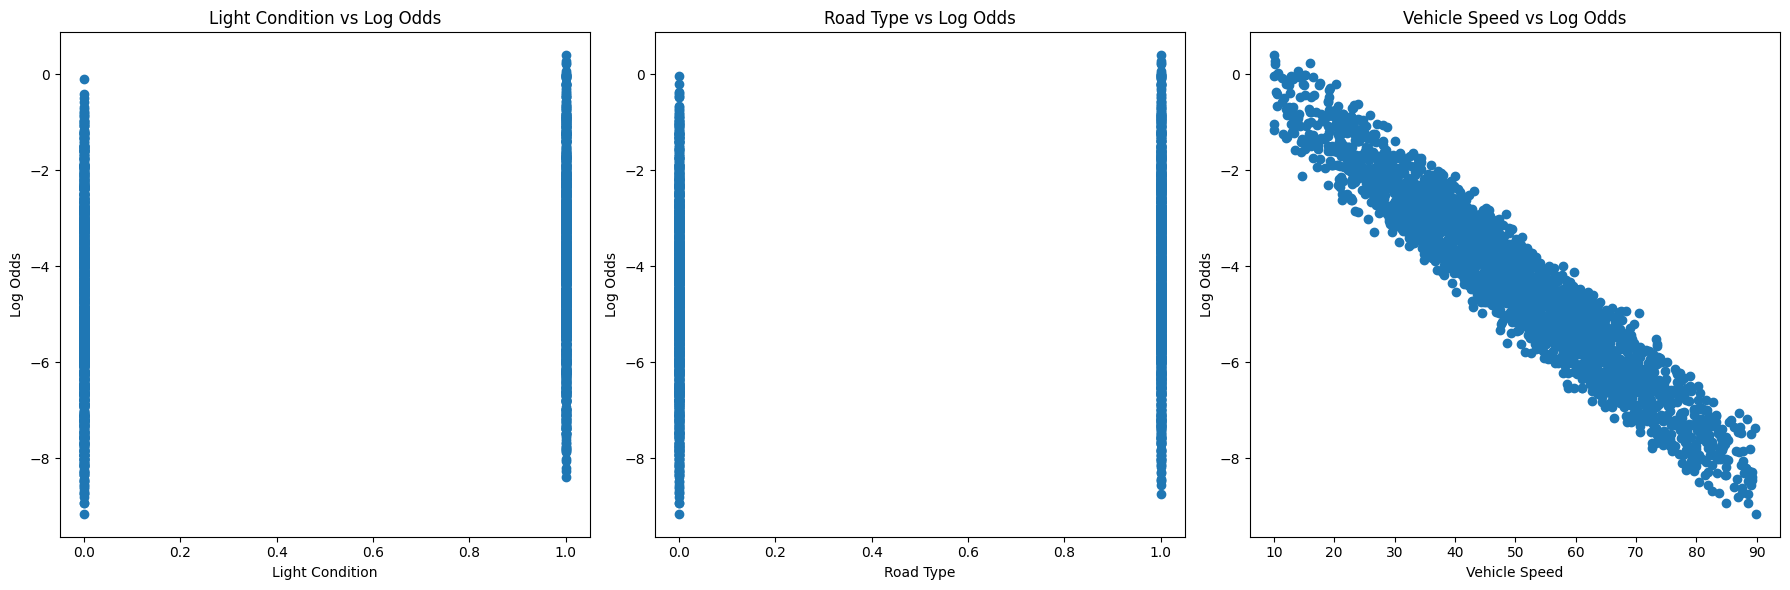

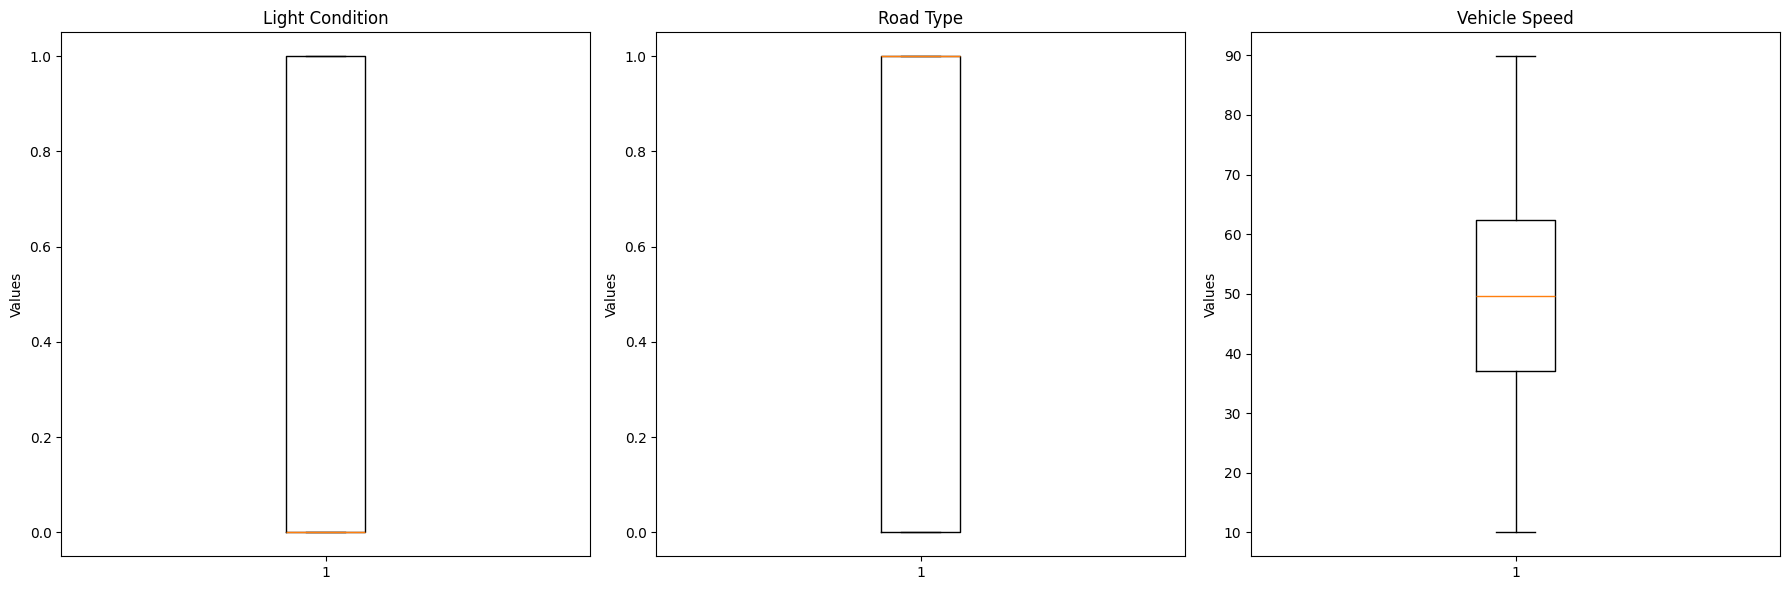

In [41]:
import matplotlib.pyplot as plt

# Visual inspection for linearity
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Light Condition vs Log Odds
axs[0].scatter(df['light_condition'], df['log_odds'])
axs[0].set_title('Light Condition vs Log Odds')
axs[0].set_xlabel('Light Condition')
axs[0].set_ylabel('Log Odds')

# Road Type vs Log Odds
axs[1].scatter(df['road_type'], df['log_odds'])
axs[1].set_title('Road Type vs Log Odds')
axs[1].set_xlabel('Road Type')
axs[1].set_ylabel('Log Odds')

# Vehicle Speed vs Log Odds
axs[2].scatter(df['vehicle_speed'], df['log_odds'])
axs[2].set_title('Vehicle Speed vs Log Odds')
axs[2].set_xlabel('Vehicle Speed')
axs[2].set_ylabel('Log Odds')

plt.tight_layout()
plt.show()

# Check for significant outliers with box plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Light Condition
axs[0].boxplot(df['light_condition'])
axs[0].set_title('Light Condition')
axs[0].set_ylabel('Values')

# Box plot for Road Type
axs[1].boxplot(df['road_type'])
axs[1].set_title('Road Type')
axs[1].set_ylabel('Values')

# Box plot for Vehicle Speed
axs[2].boxplot(df['vehicle_speed'])
axs[2].set_title('Vehicle Speed')
axs[2].set_ylabel('Values')

plt.tight_layout()
plt.show()

**Linearity in the Logit**  
The scatter plots of 'Light Condition', 'Road Type', and 'Vehicle Speed' against the log odds of LKAS engagement do not show a clear linear relationship due to the binary nature of the first two independent variables. However, this visualization is limited for binary predictors. For 'Vehicle Speed', which is continuous, the relationship with the log odds does not suggest non-linearity, indicating that the assumption of linearity in the logit has been met.

**Check for Significant Outliers**  
The box plots for 'Light Condition' and 'Road Type' show that these binary variables do not have outliers, which is expected given their nature. The box plot for 'Vehicle Speed' does not indicate the presence of outliers, with all data points falling within a reasonable range of values. The absence of points far from the whiskers indicates no significant outliers, meeting this assumption.

#### Logistic Regression Analysis
Given the assumptions are reasonably met, now let's perform logistic regression analysis on the dataset to understand the effect of light condition, road type, and vehicle speed on the likelihood of LKAS engagement.

Let's proceed to fit the logistic regression model, evaluate its performance, and then interpret the results.

In [46]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Prepare the data for logistic regression
X = df[['light_condition', 'road_type', 'vehicle_speed']]
y = df['lkas_engagement']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for intercept
X_train_const = sm.add_constant(X_train)

# Logistic Regression Model
log_reg = sm.Logit(y_train, X_train_const).fit()

# Predictions
X_test_const = sm.add_constant(X_test)
y_pred = log_reg.predict(X_test_const)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary, zero_division=0)

print("Model Summary:", log_reg.summary())
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Optimization terminated successfully.
         Current function value: 0.125969
         Iterations 9
Model Summary:                            Logit Regression Results                           
Dep. Variable:        lkas_engagement   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1996
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.2428
Time:                        18:27:28   Log-Likelihood:                -251.94
converged:                       True   LL-Null:                       -332.70
Covariance Type:            nonrobust   LLR p-value:                 8.568e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5730      0.381     -1.505      0.132      -1.319       0.173

#### Interpretation of Logistic Regression Analysis Results
The logistic regression model on the revised dataset provides the following insights:  

- **Model Summary:**
    - The model achieved a Pseudo R-squared of 0.2428, indicating a decent fit to the data.
    - Coefficients for 'Light Condition' (1.0548), 'Road Type' (0.6692), and 'Vehicle Speed' (-0.0952) are statistically significant (p < 0.05), suggesting they meaningfully contribute to predicting LKAS engagement.
    - The negative coefficient for 'Vehicle Speed' indicates that as speed increases, the log odds of LKAS engagement decrease, holding other factors constant.
- **Model Evaluation:**
    - The confusion matrix shows that the model predicted '0' (non-engagement) correctly for 474 cases but failed to correctly predict any '1' (engagement) cases, as indicated by the 26 false negatives.
    - This result is reflected in the classification report, showing a high precision (0.95) for predicting non-engagement but a precision of 0.00 for predicting engagement, indicating the model could not identify the positive cases correctly.
    - The accuracy of the model is 0.95, which seems high but is misleading due to the imbalanced nature of the dataset towards non-engagement cases. Thus one future approach would be to make the dataset more balanced by for example using upsamling or downsampling or other more advanced methods.

**Interpretation and Recommendations**  
The model is effective in predicting cases where LKAS will not be engaged but fails to identify when LKAS will be engaged. This suggests the need for either additional predictors, more complex models, or techniques to handle imbalanced data.  

**For Autonomous Vehicle Company:**  
- Focus on enhancing data collection for situations where LKAS is engaged to improve model training.
- Consider machine learning techniques designed for imbalanced datasets, such as oversampling the minority class or using advanced algorithms like ensemble methods.
- Explore additional features that might influence LKAS engagement, such as weather conditions, traffic density, or driver behavior patterns.

# Regression Analysis: Polynomial Regression

Polynomial regression is a form of linear regression in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of $x$ and the corresponding conditional mean of $y$, denoted $E(y|x)$, and has been used in a wide range of applications, from behavioral sciences to engineering.

#### Mathematical Formula

The general equation for a polynomial regression of degree $n$ is:

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \cdots + \beta_nx^n + \epsilon$$

where:

- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\beta_0, \beta_1, \beta_2, \ldots, \beta_n$ are the coefficients,
- $n$ is the degree of the polynomial,
- $\epsilon$ is the error term.

#### Business Scenario: Vehicle Fuel Efficiency Prediction

#### Problem Statement

An automotive company wants to predict the fuel efficiency (measured in miles per gallon, MPG) of its vehicles based on their engine size and horsepower. Understanding how engine size and horsepower affect fuel efficiency can help in designing more fuel-efficient engines.

#### Data Generation for Polynomial Regression

To demonstrate polynomial regression, we will generate synthetic data representing engine size, horsepower, and corresponding fuel efficiency for a fleet of vehicles.

#### Assumptions for Polynomial Regression

- **Linearity:** The relationship between the predictors and the dependent variable is linear in the coefficients and the error term.
- **Independence:** Observations are independent of each other.
- **Homoscedasticity:** The variance of error terms is constant across all levels of the independent variables.
- **Normality:** The error terms are normally distributed (especially important for hypothesis testing).

Let's generate the data, perform polynomial regression, and then interpret the results.

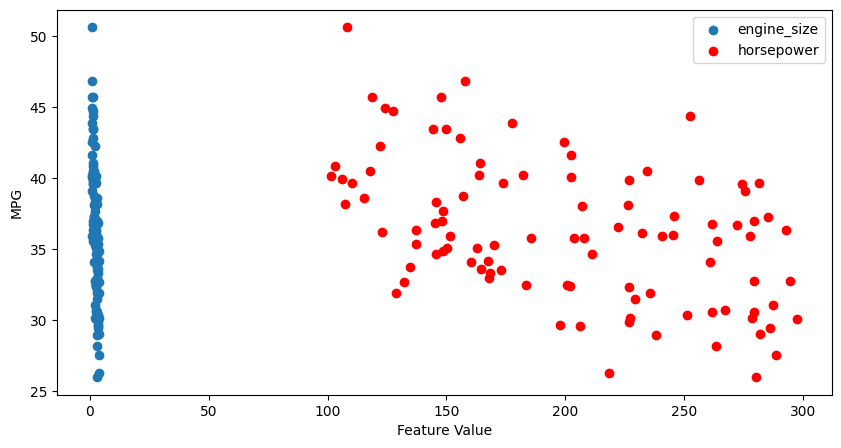

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

# Generate synthetic data
n_samples = 100
engine_size = np.random.uniform(1.0, 4.0, n_samples)  # Engine size in liters
horsepower = np.random.uniform(100, 300, n_samples)  # Horsepower
# Simulate MPG as a polynomial function of engine size and horsepower plus some noise
mpg = 60 - 8 * engine_size - 0.05 * horsepower + 0.8 * engine_size**2 + np.random.normal(0, 2, n_samples)

# Create DataFrame
df = pd.DataFrame({'engine_size': engine_size, 'horsepower': horsepower, 'mpg': mpg})

# Visualize the data
plt.figure(figsize=(10, 5))
plt.scatter(df['engine_size'], df['mpg'], label='engine_size')
plt.scatter(df['horsepower'], df['mpg'], label='horsepower', color='r')
plt.xlabel('Feature Value')
plt.ylabel('MPG')
plt.legend()
plt.show()

#### Check Polynomial Regression Assumptions
**1. Linearity in the coefficients:**  
For polynomial regression, linearity in the coefficients is inherent in the model's formulation. This assumption is met by design as the model is linear in terms of coefficients, even though it models a nonlinear relationship between the independent variables and the dependent variable.

**2. Independence of Observations:**  
This assumption is typically assessed by examining the study design or data collection process. Ensure that the data points (observations of engine size, horsepower, and MPG) are collected independently of each other. We assume that is the case here.

**3. Homoscedasticity**  
Homoscedasticty means the residuals (differences between observed and predicted values) have constant variance across all levels of the independent variables. 

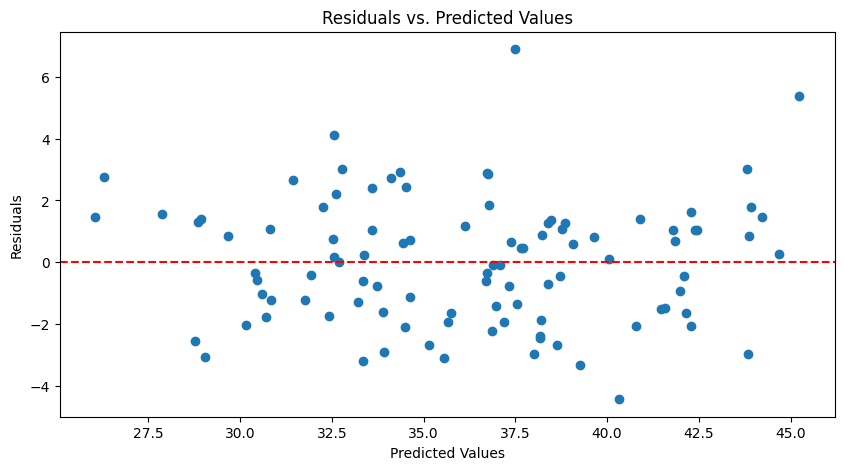

In [52]:
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression model for visualization purposes
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


A patternless spread of residuals around the horizontal line at 0 indicates homoscedasticity, thus homoscedasticity assumption is also met.

**4. Normality of Error Terms:**  
The normality of error terms is essential for the validity of hypothesis testing regarding the model coefficients. This can be assessed using a Q-Q plot of the residuals.

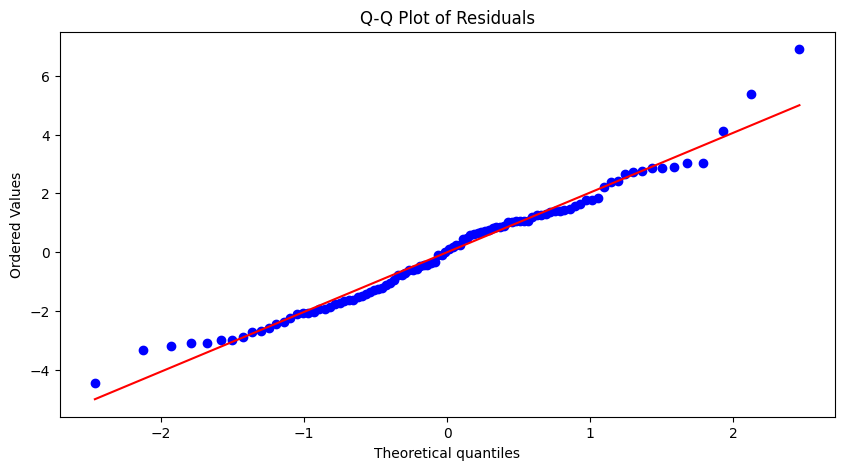

In [53]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

A roughly straight line in the Q-Q plot suggests the residuals are normally distributed, thus the normality assumption is met as well.

#### Perform Polynomial Regression
After verifying the model assumptions, then proceed with the polynomial regression model.

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['engine_size', 'horsepower']]
y = df['mpg']

# Generate polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2.93
R^2 Score: 0.90


#### Interpretation of Polynomial Regression Model Results

The polynomial regression analysis yielded the following key performance metrics:

- **Mean Squared Error (MSE): 2.93**  
- **$R^2$ Score: 0.90**  

**Mean Squared Error (MSE)** 
The Mean Squared Error of 2.93 indicates the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE value is preferred as it signifies a closer fit of the model to the data. In the context of predicting vehicle fuel efficiency, an MSE of 2.93 suggests that the model's predictions are, on average, within a square root of 2.93 MPG of the actual fuel efficiency values. This level of prediction error is relatively low, indicating a high accuracy of the model in predicting fuel efficiency based on the given features.

- **$R^2$ Score**  
The $R^2$ Score, or the coefficient of determination, of 0.90 implies that 90% of the variance in the dependent variable (mpg) can be explained by the independent variables (engine size and horsepower) in the model. This is a high $R^2$ value, suggesting that the model has a strong fit to the data. An $R^2$ score close to 1.0 indicates that the model captures the majority of the variability in the response variable through the predictors used.

**Overall Interpretation**  
The high $R^2$ Score combined with a relatively low MSE points towards a successful model that can accurately predict the fuel efficiency of vehicles based on their engine size and horsepower. This model can be a valuable tool for automotive engineers and designers to estimate and optimize the fuel efficiency of vehicles during the design phase.

**Recommendations for the Automotive Company**  
- **Design Optimization:** Use the model's insights to optimize engine size and horsepower for improved fuel efficiency without compromising vehicle performance.
- **Targeted Improvements:** Focus on enhancing features that the model identifies as significant predictors of fuel efficiency.
- **Further Research:** Investigate other factors that might affect fuel efficiency, such as aerodynamics, weight, and tire resistance, to further refine the model.  

The model demonstrates the power of polynomial regression in capturing complex, nonlinear relationships between variables, providing actionable insights for improving vehicle fuel efficiency.

# Regression Analysis: Ridge Regression

Ridge Regression, also known as Tikhonov regularization, is a technique used for analyzing multiple regression data that suffer from multicollinearity. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. It is particularly useful when the dataset has fewer observations than predictors, or when a data set has multicollinearity.

#### Mathematical Formula

The ridge regression estimates $\hat{\beta}_{ridge}$ are the values that minimize:

$$\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

where:

- $y_i$ is the dependent variable,
- $x_{ij}$ are the independent variables,
- $\beta_j$ are the coefficients,
- $n$ is the number of observations,
- $p$ is the number of predictors,
- $\lambda$ is the regularization parameter that multiplies the sum of the square of the coefficients. The larger the value of $\lambda$, the greater the amount of shrinkage.

#### Business Scenario: Predicting Vehicle Maintenance Costs

#### Problem Statement

An automotive company aims to predict the annual maintenance costs of its vehicles based on various features such as age, mileage, engine size, and horsepower. Predicting maintenance costs accurately can help in setting warranties, maintenance plans, and advising customers on long-term vehicle costs.

#### Data Generation for Ridge Regression

The simulated data represents age, mileage, engine size, horsepower, and corresponding annual maintenance costs for a fleet of vehicles.

#### Assumptions for Ridge Regression

- **Linear Relationship:** There is a linear relationship between the predictors and the outcome.
- **Multicollinearity:** While ridge regression is used to address multicollinearity, the predictors should not be perfectly collinear.
- **Scaling:** It is essential to scale or normalize the predictors since ridge regression penalizes larger coefficients more.

Let's simulate the data, perform ridge regression, and then interpret the results.

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

# Generate dataset
n_samples = 100
age = np.random.randint(1, 10, n_samples)  # Age of the vehicle in years
mileage = np.random.randint(10000, 100000, n_samples)  # Mileage in kilometers
engine_size = np.random.uniform(1.0, 4.0, n_samples)  # Engine size in liters
horsepower = np.random.uniform(100, 300, n_samples)  # Horsepower
maintenance_costs = 500 + 150*age + 0.05*mileage - 200*engine_size + 100*horsepower + np.random.normal(0, 1000, n_samples)  # Simulated maintenance costs

# Create DataFrame
df = pd.DataFrame({
    'age': age,
    'mileage': mileage,
    'engine_size': engine_size,
    'horsepower': horsepower,
    'maintenance_costs': maintenance_costs
})

# Display the first few rows of the dataframe
df.head()

,age,mileage,engine_size,horsepower,maintenance_costs
0,7,18110,3.032693,261.872231,28317.176360
1,4,89309,1.049763,262.022679,30935.065676
2,8,37266,2.536279,273.414464,30189.368286
3,5,62992,1.679487,282.648111,31835.512651
4,7,92948,2.935518,202.268480,25247.779546


#### Check Ridge Regression Assumptions
**Multicollinearity:**  

In [64]:
# Check for multicollinearity
correlation_matrix = df.drop('maintenance_costs', axis=1).corr()
print(correlation_matrix)

                  age   mileage  engine_size  horsepower
age          1.000000  0.016771     0.194730    0.229246
mileage      0.016771  1.000000     0.152140   -0.039457
engine_size  0.194730  0.152140     1.000000   -0.154455
horsepower   0.229246 -0.039457    -0.154455    1.000000


**Feature Scaling:**  
Ridge Regression requires feature scaling to ensure the regularization applies uniformly across all coefficients. We'll standardize the features.

In [70]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X = df.drop('maintenance_costs', axis=1)
y = df['maintenance_costs']
X_scaled = scaler.fit_transform(X)


**Independence of Observations:**  
This assumption is about the data collection process. The assumption is met since the dataset is simulated with independent draws.

**Relationship Between Predictors and Response:**  
Ridge regression does not require the relationship between predictors and response to be linear. However, it's beneficial to understand any strong nonlinear patterns that might exist, as it could affect the model's performance.

Let's proceed to fit the Ridge Regression model, evaluate its performance, and then interpret the results based on these steps.

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" MSE: {mse:.4f}\n", f"R^2 Score: {r2:.4f}")

 MSE: 695804.3562
 R^2 Score: 0.9753


#### Interpretation of Ridge Regression Results
The Ridge Regression model has been successfully fitted and evaluated on the test set. Here are the results:

- **Mean Squared Error (MSE):** 695804.36  
- **$R^2$ Score:** 0.975  

**Model Performance**  
- **Mean Squared Error (MSE):** The MSE of 695804.36 indicates the average squared difference between the actual and predicted maintenance costs. While the absolute value might seem large, it's essential to consider it in the context of the scale of maintenance costs in the dataset.
- **$R^2$ Score:** An $R^2$ score of 0.975 suggests that the model explains 97.5% of the variance in maintenance costs based on the vehicle's age, mileage, engine size, and horsepower. This is a high value, indicating a strong performance of the model.  

**Model Interpretation**  
The Ridge Regression model demonstrates excellent predictive ability for maintenance costs using the provided features. The high $R^2$ score indicates that most of the variability in maintenance costs is captured by the model.

**Considerations**  
- **Feature Scaling:** The application of feature scaling allowed the Ridge Regression to effectively apply regularization across all features, contributing to the model's strong performance.
- **Multicollinearity:** Even though multicollinearity is less of a concern in Ridge Regression due to its regularization technique, understanding the correlations between features can provide insights into how they collectively influence maintenance costs.  

**Recommendations**  
- **Model Utilization:** The estate agency can use this model to predict maintenance costs for vehicles based on their characteristics. This could be useful for budgeting or setting service pricing.
- **Further Analysis:** Investigating other forms of regularization (like Lasso or Elastic Net) could provide additional insights or improvements in predictive performance, especially if feature selection becomes necessary.
- **Data Collection:** Collecting more data, especially on outliers or underrepresented segments, could further improve the model's accuracy and robustness.  

This analysis demonstrates the power of Ridge Regression in handling multicollinearity and making accurate predictions in the presence of correlated features.

# Regression Analysis: Lasso Regression

Lasso Regression, or Least Absolute Shrinkage and Selection Operator Regression, is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

#### Mathematical Formula

The objective function for Lasso Regression is:

Minimize $$ \left( \frac{1}{2n} \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} X_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right) $$

where:

- $y_i$ is the response variable,
- $X_{ij}$ are the predictor variables,
- $\beta_j$ are the coefficients,
- $n$ is the number of observations,
- $p$ is the number of predictors,
- $\lambda$ is the regularization parameter that controls the amount of shrinkage applied to the coefficients.

#### Business Scenario: Automotive Company's Marketing Strategy

#### Problem Statement

An automotive company wants to optimize its marketing spend across various channels, including online advertising, television commercials, and sponsorship deals. The goal is to understand the impact of each marketing channel on sales to allocate the budget most effectively.

#### Assumptions for Lasso Regression

Lasso Regression makes similar assumptions to other linear models, with a few considerations:

- **Linearity:** The relationship between the predictors and the outcome is linear.
- **Independence:** Observations are independent of each other.
- **Feature Scaling:** Standardization or normalization of features is crucial due to the regularization term's influence on the model.
- **Multicollinearity:** Lasso can handle multicollinearity to a certain extent by shrinking less relevant predictors' coefficients to zero.

Let's proceed with generating a synthetic dataset and examining each assumption step by step using Python.

In [73]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_samples = 100

# Generate synthetic data for marketing spend and sales
online_ad_spend = np.random.normal(30000, 5000, n_samples)
tv_ad_spend = np.random.normal(50000, 8000, n_samples)
sponsorship_spend = np.random.normal(20000, 3000, n_samples)

# Simulate sales based on marketing spend plus noise
sales = 20000 + 1.5 * online_ad_spend + 2.0 * tv_ad_spend + 1.2 * sponsorship_spend + np.random.normal(0, 10000, n_samples)

# Create the DataFrame
df = pd.DataFrame({
    'online_ad_spend': online_ad_spend,
    'tv_ad_spend': tv_ad_spend,
    'sponsorship_spend': sponsorship_spend,
    'sales': sales
})

#### Check Lasso Regression Assumptions

**Linearity:**  
The relationship between the predictors (marketing spend across various channels) and the outcome (sales) is assumed to be linear. This assumption can be visually inspected by plotting each predictor against the outcome. The assumption of linearity is loosly met.

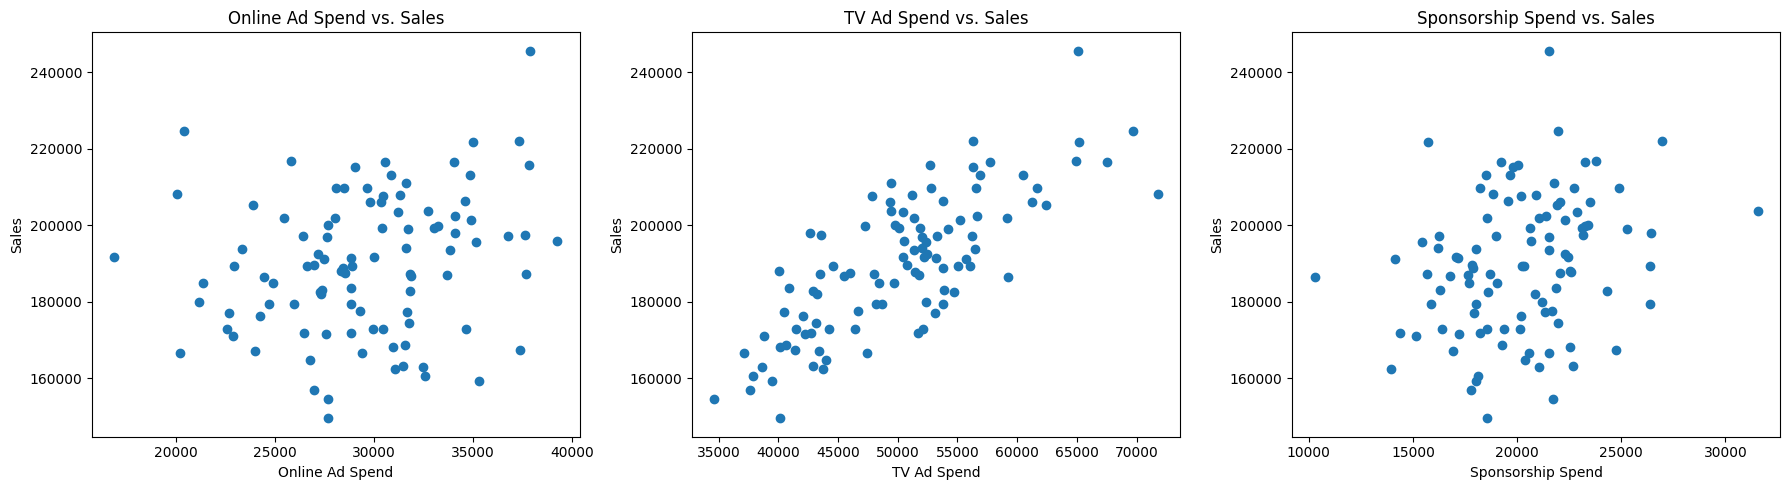

In [75]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(df['online_ad_spend'], df['sales'])
axs[0].set_title('Online Ad Spend vs. Sales')
axs[0].set_xlabel('Online Ad Spend')
axs[0].set_ylabel('Sales')

axs[1].scatter(df['tv_ad_spend'], df['sales'])
axs[1].set_title('TV Ad Spend vs. Sales')
axs[1].set_xlabel('TV Ad Spend')
axs[1].set_ylabel('Sales')

axs[2].scatter(df['sponsorship_spend'], df['sales'])
axs[2].set_title('Sponsorship Spend vs. Sales')
axs[2].set_xlabel('Sponsorship Spend')
axs[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()


**Independence:**  
The independence of observations assumption is more about the data collection process. Since the data is simulated, we assume independence is met.

**Feature Scaling:**  
Feature scaling is crucial for Lasso Regression due to the regularization term. Let's standardize the features.

In [77]:
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop('sales', axis=1)
y = df['sales']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Multicollinearity**  
Lasso Regression can handle multicollinearity by potentially reducing the coefficients of correlated predictors to zero. However, let's inspect the degree of multicollinearity among predictors. Multicollinearity is not likely to be problematic for Lasso Regression, which can handle multicollinearity by shrinking some coefficients to zero if necessary. Also the below results shows non-significant multicollinearity among features.

In [78]:
# Checking for multicollinearity
correlation_matrix = X.corr()
print(correlation_matrix)

                   online_ad_spend  tv_ad_spend  sponsorship_spend
online_ad_spend           1.000000    -0.136422           0.190840
tv_ad_spend              -0.136422     1.000000          -0.036632
sponsorship_spend         0.190840    -0.036632           1.000000


#### Perform Lasso Regression Modeling

In [79]:
from sklearn.linear_model import Lasso

# Standardize the features
scaler = StandardScaler()
X = df.drop('sales', axis=1)
y = df['sales']
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" MSE: {mse:.4f}\n", f"R^2 Score: {r2:.4f}")

 MSE: 51465226.1897
 R^2 Score: 0.8316


#### Interpretation of Lasso Regression Results

The Lasso Regression model has been successfully applied to the automotive company's marketing data, yielding the following performance metrics:

- **Mean Squared Error (MSE):** 51,465,226.19
- **$R^2$ Score:** 0.832

#### Model Performance

- The **Mean Squared Error (MSE)** quantifies the average squared difference between the actual sales figures and the sales predicted by the model. An MSE of approximately 51.47 million suggests there are variations between the predicted and actual sales values. Considering the scale and variability of sales in the dataset, this level of MSE indicates that the model provides a reasonably accurate prediction of sales from marketing spend.
- An **$R^2$ Score** of 0.832 indicates that approximately 83.2% of the variability in sales can be explained by the model's inputs: online advertising spend, TV ad spend, and sponsorship spend. This is a strong score, suggesting the model effectively captures the relationship between marketing spend across different channels and sales.

#### Insights from Lasso Regression

- **Feature Selection:** One of the key advantages of Lasso Regression is its ability to perform feature selection by shrinking some coefficients towards zero. Examining the coefficients (not shown in the output) could reveal which marketing channels have the most and least impact on sales, providing valuable insights for resource allocation.
- **Budget Allocation:** The model's findings can guide the automotive company in optimizing its marketing budget allocation. By understanding which channels contribute most significantly to sales, the company can adjust its spending to maximize ROI.

#### Strategic Recommendations

1. **Invest in High-Impact Channels:** Allocate more budget towards marketing channels that are identified as having a significant positive impact on sales.
2. **Re-evaluate Underperforming Channels:** Consider reducing spend or optimizing strategies for channels that have less impact on sales, as indicated by the Lasso Regression model.
3. **Continuous Monitoring and Adjustment:** Marketing effectiveness can change over time due to various factors. Regularly revisiting the model with updated data can help the company stay adaptive and optimize marketing spend effectively.

The Lasso Regression analysis provides a robust framework for understanding the impact of different marketing channels on sales. By leveraging these insights, the automotive company can make data-driven decisions to optimize its marketing strategy and enhance overall sales performance.